<a href="https://colab.research.google.com/github/RocafellaGitub/MaikanoRocafellaSteve/blob/main/Diabetes_Model_Training_and_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TO PREPROCESS AND PERFORM EXPLORATORY DATA ANALYSIS FOR DIABETES


FIRST STEP:
IMPORT ALL NEEDED LIBRARIES

In [61]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk

STEP 2: LOAD THE DATASET

In [4]:
import pandas as pd
df=pd.read_csv("Diabetes-Classification.csv")

In [7]:
# TO VIEW THE DATASET
pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         128 non-null    int64  
 1   Gender                      128 non-null    object 
 2   BMI                         125 non-null    float64
 3   Blood Pressure              128 non-null    object 
 4   FBS                         128 non-null    int64  
 5   HbA1c                       128 non-null    float64
 6   Family History of Diabetes  126 non-null    object 
 7   Smoking                     126 non-null    object 
 8   Diet                        126 non-null    object 
 9   Exercise                    127 non-null    object 
 10  Diagnosis                   128 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 11.1+ KB


In [21]:
df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25.0,2,100,5.7,0,0,0,1,0
1,55,0,30.0,0,120,6.4,1,1,1,0,1
2,65,1,35.0,0,140,7.1,1,1,1,0,1
3,75,0,40.0,0,160,7.8,1,1,1,0,1
5,50,0,25.0,2,100,5.7,0,0,0,1,0


To describe the statistics analysis
This is to ensure the
1. Standard deviation
2. Mean and minimum
3. quarter datasize lies within this range
4. Half of the datasize and Maximum amount od datasize.

In [7]:
df.describe()

,Age,BMI,FBS,HbA1c
count,128.000000,125.000000,128.000000,128.000000
mean,43.335938,36.136000,162.500000,7.887500
std,20.889766,16.270071,61.323975,2.146339
min,12.000000,10.000000,80.000000,5.000000
25%,29.500000,24.000000,120.000000,6.400000
50%,41.000000,34.000000,160.000000,7.800000
75%,55.000000,47.000000,205.000000,9.375000
max,185.000000,105.000000,280.000000,12.000000


To Check if there are Null values from the datasets
BMI has 3
Family history has 2
Smoking 2
Diet 2
Exercise 1

In [8]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,3
Blood Pressure,0
FBS,0
HbA1c,0
Family History of Diabetes,2
Smoking,2
Diet,2
Exercise,1


Remove the null datasets from missing datasets.
Now everythis is zero, which means there are no null values in the datasets.

In [12]:
df=df.dropna()
df.isnull() .sum()

,0
Age,0
Gender,0
BMI,0
Blood Pressure,0
FBS,0
HbA1c,0
Family History of Diabetes,0
Smoking,0
Diet,0
Exercise,0


IF WE CHECK THE DATASETS WE CAN SEE THAT THE DATASETS CONTAINS SOME STRING DATATYPES and again CATEGORICAL VARIABLES CONFUSE our model, thereby we use a technique called ENCODING


In [22]:
#CATEGORICAL DATA VALUES
#ENCODING

from sklearn.preprocessing import LabelEncoder
cat_col=['Gender','Blood Pressure','Family History of Diabetes','Smoking','Diet','Exercise','Diagnosis']

le=LabelEncoder()
for col in cat_col:
    df[col]=le.fit_transform(df[col])

    #PRINT THE RSULT OF THE LABEL ENCODER

df.head()

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis
0,45,1,25.0,2,100,5.7,0,0,0,1,0
1,55,0,30.0,0,120,6.4,1,1,1,0,1
2,65,1,35.0,0,140,7.1,1,1,1,0,1
3,75,0,40.0,0,160,7.8,1,1,1,0,1
5,50,0,25.0,2,100,5.7,0,0,0,1,0


FROM THE ABOVE RESULT, I CAN NOW SEE THAT THE COLUMN WITH THE STRING DATATYPE WERE ALL ENCODED TO A NUMERIC FORM OF (0,1)

NEXT IS TO PERFORM A ONE-HOT ENCODING TECHNIQUES ON THE MODEL
#ONEHOT ENCODING TECHNIQUES

In [24]:
one_encode=pd.get_dummies(df,columns=['Gender'])
one_encode.head()

,Age,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,Gender_0,Gender_1
0,45,25.0,2,100,5.7,0,0,0,1,0,False,True
1,55,30.0,0,120,6.4,1,1,1,0,1,True,False
2,65,35.0,0,140,7.1,1,1,1,0,1,False,True
3,75,40.0,0,160,7.8,1,1,1,0,1,True,False
5,50,25.0,2,100,5.7,0,0,0,1,0,True,False


#NEXT WAS TO PRODUCE A LABEL ENCODING OF THE STRING IN THE GENDER COLUMN TO NUMBER.
EITHER USING THE MALE OR FEMALE (0/1)

In [29]:
one_encode['Gender_0']=le.fit_transform(one_encode['Gender_0'])
one_encode

,Age,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise,Diagnosis,Gender_0,Gender_1
0,45,25.0,2,100,5.7,0,0,0,1,0,1,1
1,55,30.0,0,120,6.4,1,1,1,0,1,0,0
2,65,35.0,0,140,7.1,1,1,1,0,1,1,1
3,75,40.0,0,160,7.8,1,1,1,0,1,0,0
5,50,25.0,2,100,5.7,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
123,17,15.0,2,100,5.7,0,1,1,0,1,0,0
124,22,19.0,2,120,6.4,0,1,1,0,1,1,1
125,27,24.0,0,140,7.1,0,1,1,0,1,0,0
126,32,29.0,0,160,7.8,0,1,1,0,1,1,1


I CAN NOW APPLY ONEHOT ENCODING TO ALL THE OTHER NORMINAL VALUES OF THE COLUMS

In [39]:
one_encode=pd.get_dummies(df,columns=cat_col)

cat_col=['Gender','Blood Pressure','Family History of Diabetes','Smoking','Diet','Exercise',]
one_encode

,Age,BMI,FBS,HbA1c,Gender_0,Gender_1,Blood Pressure_0,Blood Pressure_1,Blood Pressure_2,Family History of Diabetes_0,Family History of Diabetes_1,Smoking_0,Smoking_1,Diet_0,Diet_1,Exercise_0,Exercise_1,Diagnosis_0,Diagnosis_1
0,45,25.0,100,5.7,False,True,False,False,True,True,False,True,False,True,False,False,True,True,False
1,55,30.0,120,6.4,True,False,True,False,False,False,True,False,True,False,True,True,False,False,True
2,65,35.0,140,7.1,False,True,True,False,False,False,True,False,True,False,True,True,False,False,True
3,75,40.0,160,7.8,True,False,True,False,False,False,True,False,True,False,True,True,False,False,True
5,50,25.0,100,5.7,True,False,False,False,True,True,False,True,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,17,15.0,100,5.7,True,False,False,False,True,True,False,False,True,False,True,True,False,False,True
124,22,19.0,120,6.4,False,True,False,False,True,True,False,False,True,False,True,True,False,False,True
125,27,24.0,140,7.1,True,False,True,False,False,True,False,False,True,False,True,True,False,False,True
126,32,29.0,160,7.8,False,True,True,False,False,True,False,False,True,False,True,True,False,False,True


In [42]:
one_encode.columns

Index(['Age', 'BMI', 'FBS', 'HbA1c', 'Gender_0', 'Gender_1',
       'Blood Pressure_0', 'Blood Pressure_1', 'Blood Pressure_2',
       'Family History of Diabetes_0', 'Family History of Diabetes_1',
       'Smoking_0', 'Smoking_1', 'Diet_0', 'Diet_1', 'Exercise_0',
       'Exercise_1', 'Diagnosis_0', 'Diagnosis_1'],
      dtype='object')

In [47]:
cat_col=['Gender_0', 'Gender_1',
       'Blood Pressure_0', 'Blood Pressure_1', 'Blood Pressure_2',
       'Family History of Diabetes_0', 'Family History of Diabetes_1',
       'Smoking_0', 'Smoking_1', 'Diet_0', 'Diet_1', 'Exercise_0',
       'Exercise_1','Diagnosis_0', 'Diagnosis_1'] # Updated to reflect one-hot encoded columns

# Loop through relevant one-hot encoded columns if needed,
# or target specific columns for label encoding
# For example, to convert boolean columns from get_dummies to integers (0/1) explicitly:
for c in ['Gender_0', 'Gender_1', 'Blood Pressure_0', 'Blood Pressure_1', 'Blood Pressure_2',
          'Family History of Diabetes_0', 'Family History of Diabetes_1', 'Smoking_0', 'Smoking_1',
          'Diet_0', 'Diet_1', 'Exercise_0', 'Exercise_1', 'Diagnosis_0', 'Diagnosis_1']:
    if c in one_encode.columns:
        one_encode[c] = le.fit_transform(one_encode[c])

# Display the head of the DataFrame to verify changes
one_encode.head()

,Age,BMI,FBS,HbA1c,Gender_0,Gender_1,Blood Pressure_0,Blood Pressure_1,Blood Pressure_2,Family History of Diabetes_0,Family History of Diabetes_1,Smoking_0,Smoking_1,Diet_0,Diet_1,Exercise_0,Exercise_1,Diagnosis_0,Diagnosis_1
0,45,25.0,100,5.7,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0
1,55,30.0,120,6.4,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1
2,65,35.0,140,7.1,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1
3,75,40.0,160,7.8,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1
5,50,25.0,100,5.7,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0


#HANDLING OUTLIERS
LOOKING AT THE OUTLIER USING BOXPLOT


CORRELATION CODE


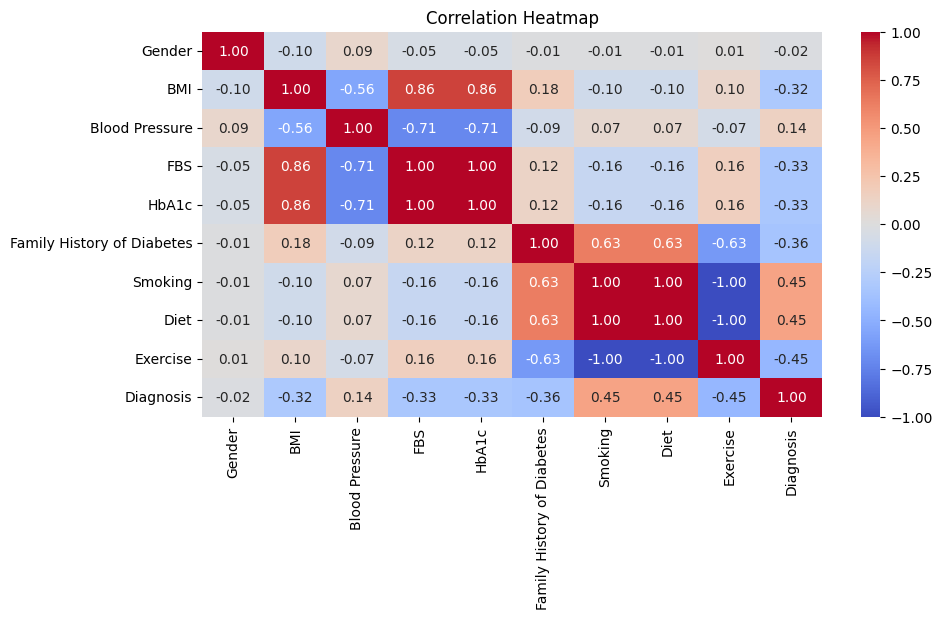

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
numericdf=df.drop('Age', axis=1)
corr=numericdf.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

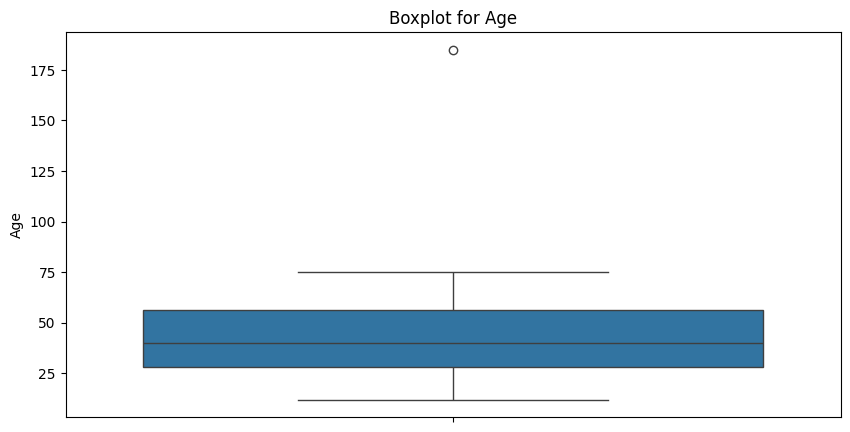

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.boxplot(data=df['Age'])
plt.title("Boxplot for Age")
plt.show()

In [83]:
from sklearn.preprocessing import RobustScaler
scaled_numericdf=RobustScaler().fit_transform(numericdf)
scaled_numericdf=pd.DataFrame(scaled_numericdf,columns=numericdf.columns)
print(scaled_numericdf.describe())

           Gender         BMI  Blood Pressure         FBS       HbA1c  \
count  118.000000  118.000000      118.000000  118.000000  118.000000   
mean    -0.483051    0.090626        0.338983    0.035593    0.035593   
std      0.501844    0.675212        0.452351    0.622447    0.622447   
min     -1.000000   -0.979592        0.000000   -0.800000   -0.800000   
25%     -1.000000   -0.408163        0.000000   -0.400000   -0.400000   
50%      0.000000    0.000000        0.000000    0.000000    0.000000   
75%      0.000000    0.591837        1.000000    0.600000    0.600000   
max      0.000000    2.897959        1.000000    1.200000    1.200000   

       Family History of Diabetes     Smoking        Diet    Exercise  \
count                  118.000000  118.000000  118.000000  118.000000   
mean                     0.398305   -0.372881   -0.372881    0.372881   
std                      0.491637    0.485633    0.485633    0.485633   
min                      0.000000   -1.000000   -1

In [104]:
from sklearn.preprocessing import StandardScaler
scaled_numericdf=StandardScaler().fit_transform(numericdf)
scaled_numericdf=pd.DataFrame(scaled_numericdf,columns=numericdf.columns)
#scaled_numericdf
print(scaled_numericdf.describe())

             Gender           BMI  Blood Pressure           FBS         HbA1c  \
count  1.180000e+02  1.180000e+02    1.180000e+02  1.180000e+02  1.180000e+02   
mean   1.467752e-16  1.900551e-16    7.715109e-17  9.832060e-17  9.737973e-17   
std    1.004264e+00  1.004264e+00    1.004264e+00  1.004264e+00  1.004264e+00   
min   -1.034493e+00 -1.591770e+00   -7.525767e-01 -1.348157e+00 -1.348157e+00   
25%   -1.034493e+00 -7.418657e-01   -7.525767e-01 -7.027920e-01 -7.027920e-01   
50%    9.666572e-01 -1.347911e-01   -7.525767e-01 -5.742659e-02 -5.742659e-02   
75%    9.666572e-01  7.454670e-01    1.467525e+00  9.106216e-01  9.106216e-01   
max    9.666572e-01  4.175439e+00    1.467525e+00  1.878670e+00  1.878670e+00   

       Family History of Diabetes       Smoking          Diet      Exercise  \
count                1.180000e+02  1.180000e+02  1.180000e+02  1.180000e+02   
mean                -1.881734e-18  1.317214e-17  1.317214e-17 -1.317214e-17   
std                  1.004264e+00

#TO CREATE A LINEAR REGRESSION MODEL

In [66]:
from inspect import modulesbyfile
from sklearn.linear_model import LinearRegression
model=LinearRegression()

#NEXT I NEED TO CREATE A FEATURE AND A LABEL

In [94]:
x=numericdf.drop('Diagnosis',axis=1)
y=numericdf['Diagnosis']

xscaled=RobustScaler().fit_transform(x)

#TRAIN_TEST_SPLIT

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(xscaled,y,test_size=0.3,random_state=15)

##TRAIN MY LINEAR REGRESSION MODEL

In [73]:
model=model.fit(x_train,y_train)

##MAKE PREDICTION AND EVALUATE MY MODEL (REGR MODEL)

In [95]:
ypred=model.predict(x_test)

from sklearn.metrics import r2_score,mean_squared_error
#r2: higher is better
r2=r2_score(y_test,ypred)

r2

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


0.002825950770359076

#MSE: Error in your model fit (lower is better)

In [96]:

mse=mean_squared_error(y_test,ypred)
mse

0.24929351230741023

In [111]:
X_train, X_test, Y_train, Y_test=train_test_split(x, y, test_size=0.2, random_state=42)

# TRAIN LINEAR REGRESSION MODEL

In [98]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

##PREDICTIONS

In [99]:
y_pred=model.predict(X_test)

##MODEL EVALUATION

In [112]:
mse=mean_squared_error(Y_test, y_pred)
r2=r2_score(Y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared Score: {r2:.2f}')

Mean Squared Error: 0.00
R-squared Score: 0.99


# #SCATTER PLOT: ACTUAL VS PREDICTED TEMPERATURE

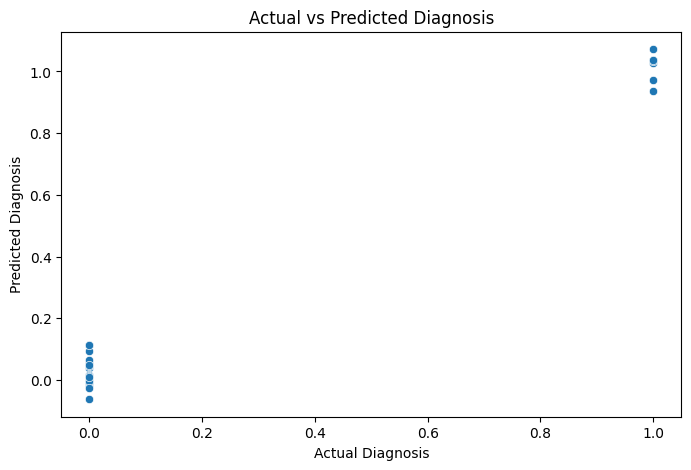

In [113]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=Y_test, y=y_pred)
plt.xlabel('Actual Diagnosis')
plt.ylabel('Predicted Diagnosis')
plt.title('Actual vs Predicted Diagnosis')
plt.show()

# # USING DIFFERENT LINEAR REGRESSION TYPES TO COMPARE THE MODELS
# SIMPLE REGRESSION
# LASSO REGRESSION L1
# RIDGE REGRESSION L2

In [115]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#DEFINE MODELS
models={
    "Simple Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
}
#store result in
result={}
#Train and Evaluate each Model
for name, model in models.items():
    model.fit(X_train, Y_train)
    y_pred=model.predict(X_test)
    mse=mean_squared_error(Y_test,y_pred)
    r2=r2_score(Y_test,y_pred)
    result[name]={"MSE": mse, "R² Score":r2}

#CONVERT RESULT TO DATAFRAME AND DISPLAY
result_df=pd.DataFrame(result).T
print(result_df)

                               MSE  R² Score
Simple Linear Regression  0.002849  0.986208
Ridge Regression          0.004076  0.980269
Lasso Regression          0.185752  0.100896


#PLOT COMPARISON

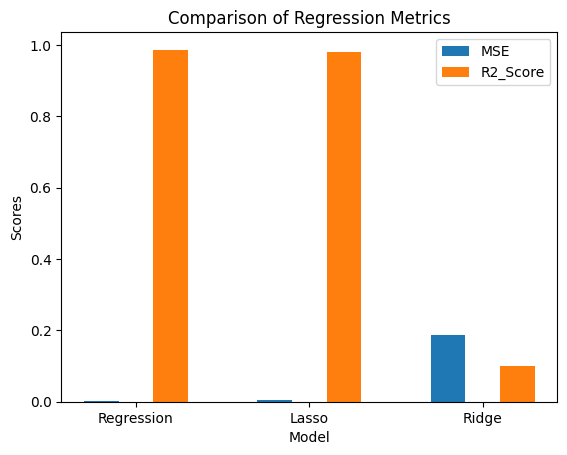

In [116]:
import matplotlib.pyplot as plt
import numpy as np

mse=result_df['MSE']
r2_score=result_df['R² Score']

positions=np.arange(len(mse))
bar_width=0.2

plt.bar(positions - bar_width, mse, width=bar_width, label='MSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label='R2_Score')

#adding Labels and Titles
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Comparison of Regression Metrics')

#ADDING THE LEGEND
plt.legend()
plt.xticks(positions, ['Regression', 'Lasso', 'Ridge'])
plt.show()